<a href="https://colab.research.google.com/github/eedanileiko/Data-Analytics-Portfolio/blob/main/Hypothesis_testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Андан на экономе
</center>



**ФИО:** Данилейко Екатерина Евгеньевна

## Общая информация

__Жесткий дедлайн:__ 23:59MSK 26.03.2025

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1: обязательная

За эту часть можно получить 100 баллов.

### Задача №1: Лучше найди себе девушку! (15 баллов)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZQ0-anIcnzg', width=400, height=320)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [ ]:
#красивая функция для теста гипотез

def asy_mean_test(mean_hat, std_hat, mu_0=0,
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """

    z_obs = (mean_hat - mu_0)/std_hat

    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)

        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))

    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)

        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)

        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))


    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]

    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]

        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin,
                 h*y_max, round(statistic, 2), color=color, fontsize=16)

        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)

    return p_value

In [ ]:
df = pd.read_csv('dating_is_hard.csv')

In [ ]:
df.head()

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion


__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

<font color='blue'>__ГИПОТЕЗА №1__</font>
1. H0 - средний рост мужчин в приложении совпадает с их реальным средним ростом (mu_r=mu_app).
2. H1 - средний рост мужчин в приложении не совпадает с их реальным средним ростом (mu_r!=mu_app).

0.751 попадает в (-1.96 , 1.96) => Нулевая гипотеза НЕ отвергается


0.4528011169360948

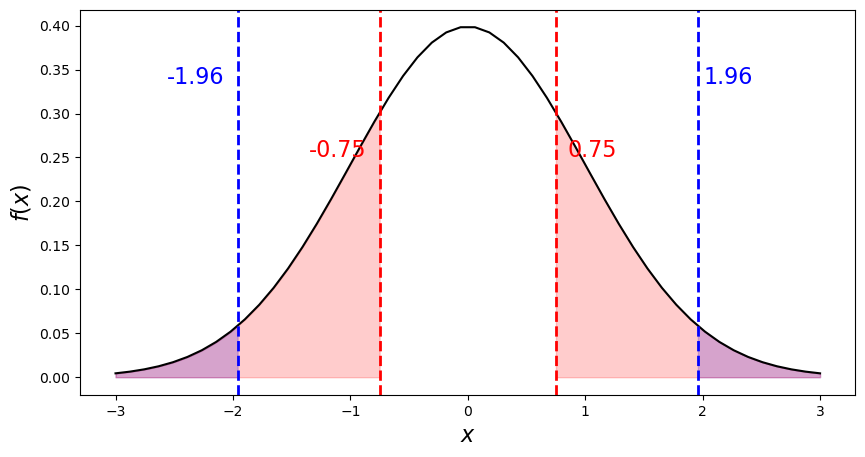

In [ ]:
#гипотеза №1
alpha = 0.05
x = df[df['sex'] == 'm']['height'].values
y = 69

diff = x.mean() - y
nx = x.size
diff_std = np.sqrt(x.var(ddof=1)/nx + 3)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha/2)

print(f'{z_obs:.3} попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза НЕ отвергается')
asy_mean_test(diff, diff_std, mu_0=0, alpha=alpha)

<font color='blue'>__ГИПОТЕЗА №2__</font>
1. H0 - средний рост женщин в приложении совпадает с их реальным средним ростом (mu_r=mu_app).
2. H1 - средний рост женщин в приложении не совпадает с их реальным средним ростом (mu_r!=mu_app).

0.652 попадает в (-1.96 , 1.96) => Нулевая гипотеза НЕ отвергается


0.5144893783313251

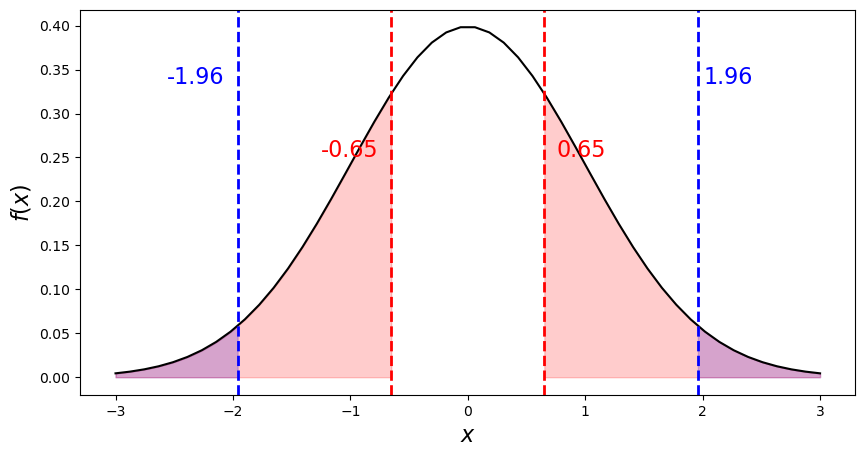

In [ ]:
#гипотеза №2
alpha = 0.05
x = df[df['sex'] == 'f']['height'].values
y = 63.7

diff = x.mean() - y
nx = x.size
diff_std = np.sqrt(x.var(ddof=1)/nx + 3)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha/2)

print(f'{z_obs:.3} попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза НЕ отвергается')
asy_mean_test(diff, diff_std, mu_0=0, alpha=alpha)

__Вывод:__ в обоих случаях мы отвергли нулевую гипотезу, что означает, что в приложении часто врут и не называют свой настоящий рост.

__б) [5 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

1. H0 - доля мужчин-алкоголиков не выше доле женщин-алкоголиков.
2. H1 - доля мужчин-алкоголиков выше доли женщин-алкоголиков.

Наблюдаемое значение 1.2067 меньше критического 1.64 => нулевая гипотеза не отвергается


0.11376794783090838

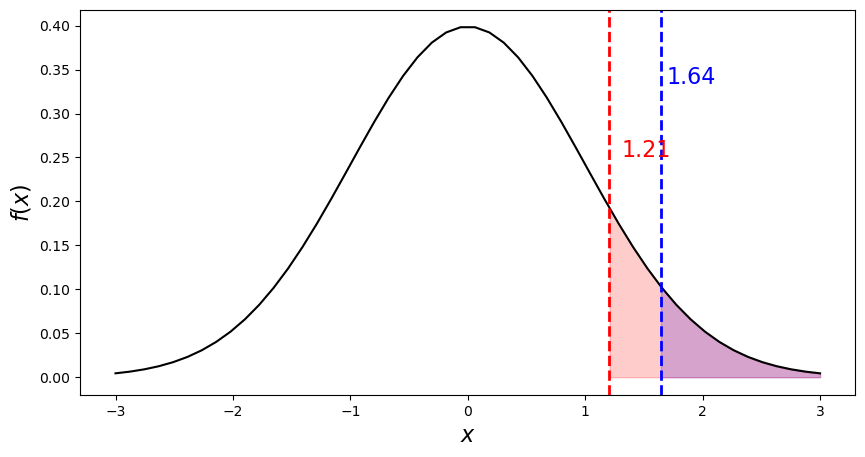

In [ ]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = df[df['sex']=='f'].size, df[df['sex']=='m'].size       # размер выборок

diff = df[df['sex']=='m']['is_heavy_drinker'].mean() - df[df['sex']=='f']['is_heavy_drinker'].mean() # разность средних
women=df[df['sex']=='f']['is_heavy_drinker']
men=df[df['sex']=='m']['is_heavy_drinker']
diff_std = np.sqrt(women.var(ddof=1)/nx + men.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std                                           # наблюдаемое значение
z_crit = stats.norm.ppf(1 - alpha)                              # критическое значение

print(f'Наблюдаемое значение {z_obs:.5} меньше критического {z_crit:.3} => нулевая гипотеза не отвергается')

asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')

__Вывод:__ гипотеза(доля мужчин-алкоголиков выше доли женщин-алкоголиков) неверная.

__в) [5 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

1. H0 - алкоголики склонны к курению небольше неалкоголиков
2. H1 -алкоголики больше склонны к курению, чем неалкоголики

Наблюдаемое значение 0.66252 меньше критического 1.64 => нулевая гипотеза не отвергается


0.25381913324914096

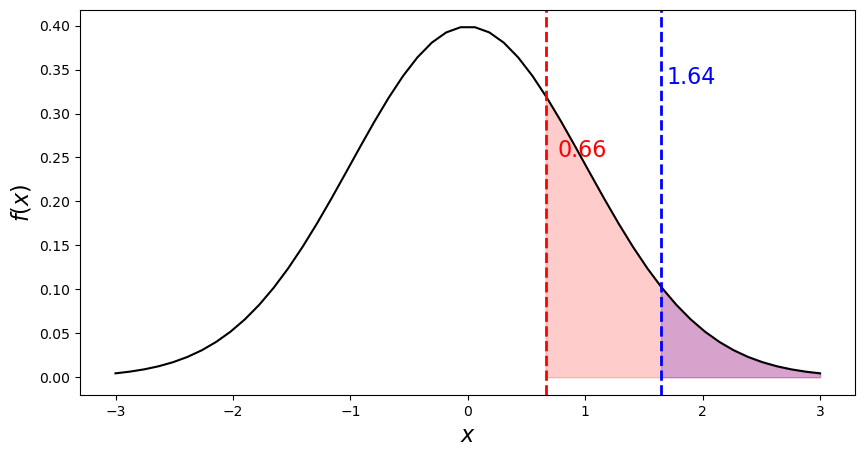

In [ ]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = df[(df['is_heavy_drinker']==True)]['smokes'].size, df[(df['is_heavy_drinker']==False)]['smokes'].size       # размер выборок
alc=df[(df['is_heavy_drinker']==True)]['smokes']
no_alc=df[(df['is_heavy_drinker']==False)]['smokes']
diff = alc.mean() - no_alc.mean() # разность средних
diff_std = np.sqrt(alc.var(ddof=1)/nx + no_alc.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std                                           # наблюдаемое значение
z_crit = stats.norm.ppf(1 - alpha)                              # критическое значение

print(f'Наблюдаемое значение {z_obs:.5} меньше критического {z_crit:.3} => нулевая гипотеза не отвергается')
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')

**Вывод:** алкоголики не больше склонны к курению.

### Задача №2: Глаза и волосья (20 баллов)

 <img alt="Dark" src="img4.png" width=300, align = "center">

Учеными уже доказано, что цвет волос и глаз передается наследственно: генетически моно объянить от 61\% до 100\% вариации в этих показателях. В [исследовании](https://www.cambridge.org/core/journals/twin-research-and-human-genetics/article/genetic-overlap-between-hair-and-eye-color/FA37E967F280E4B313B171A326AAFBB3#article) решили определить, какие факторы, помимо гена пигментации (меланина), могут влиять на внешний вид людей. Эксперимент проводился в Нидерландах и данные о нем можно найти в файле dataTask2.csv).

Вам предстоит проанализровать зависимость двух показателей, располагающихся в соответсвующих колонках:

1. Цвет волос (`HairColor`)
- `Blond`
- `Red`
- `Brown`
- `Black`

2. Цвет глаз (`EyeColor`)

- `Brown`
- `Grey`
- `Green`
- `Green brown`


In [ ]:
df = pd.read_csv("data_hair_eye.csv", index_col = "Index")
df.head()

,EyeColor,HairColor
Index,,
0,Brown,Blond
1,Brown,Blond
2,Brown,Blond
3,Brown,Blond
4,Brown,Blond


**a) [3 балла]**. Вы имеете дело с "длинным" форматом данных, то есть каждой строке соответсвует одно наблюдение, а каждой колонке - отдельынй показатель. Теперь вам предстоит это изменить - перевести данные в формат таблицы сопряженности. Вспомнить ее вы можете из курса матстата, однако дополнительно можно почитать [здесь](https://mathworld.wolfram.com/ContingencyTable.html). Переведите данные в формат `contingency table`.

In [ ]:
data = pd.crosstab(df['HairColor'], df['EyeColor'])
data.head()

EyeColor,Blue,Brown,Gray,Green brown
HairColor,,,,
Black,4428,11758,4653,4682
Blond,155040,37102,121157,35517
Brown,21970,31791,22294,16763
Red,4595,1671,4000,1493


**б) [3 балла]**. Далее необходимо проанализировать данные. Выведите самый популярный цвет волос и самый популярный цвет глаз в выборке. Также выведите выборочные вероятностьи встретить эти характеристки в категориях, где они занимают наименьшую долю (в цветах глаз и в цветах волос соответственно).

Интерпретируйте результаты относительно страны, в которой проводилось исследование.

In [ ]:
hair_color_counts = df['HairColor'].value_counts()
eye_color_counts = df['EyeColor'].value_counts()

# Самый популярный цвет волос
most_popular_hair_color = hair_color_counts.idxmax()
print(f"Самый популярный цвет волос: {most_popular_hair_color}")

# Самый популярный цвет глаз
most_popular_eye_color = eye_color_counts.idxmax()
print(f"Самый популярный цвет глаз: {most_popular_eye_color}")

Самый популярный цвет волос: Blond
Самый популярный цвет глаз: Blue


In [ ]:
least_eye = eye_color_counts.idxmin()
least_eye = df[df['EyeColor'] == least_eye]['HairColor'].value_counts(normalize=True)
least_eye

HairColor
Blond    0.607596
Brown    0.286768
Black    0.080096
Red      0.025541
Name: proportion, dtype: float64

In [ ]:
least_hair = hair_color_counts.idxmin()
least_hair = df[df['HairColor'] == least_hair]['EyeColor'].value_counts(normalize=True)
least_hair

EyeColor
Blue           0.390765
Gray           0.340165
Brown          0.142104
Green brown    0.126967
Name: proportion, dtype: float64

**Вывод:** <font color='blue'>Так как исследование было проведено в Нидерландах, то мы можем говорить об особеннностях внешности представителей данной страны: светлые волосы и голубые глаза.</font>

**в) [3 балла]**. Визуализируйте распределение цветов глаз для каждого цвета волос. Попробуйте воспользоваться функцией [`mosaic()`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html), или же обычными столбчатыми графиками

<Figure size 1200x800 with 0 Axes>

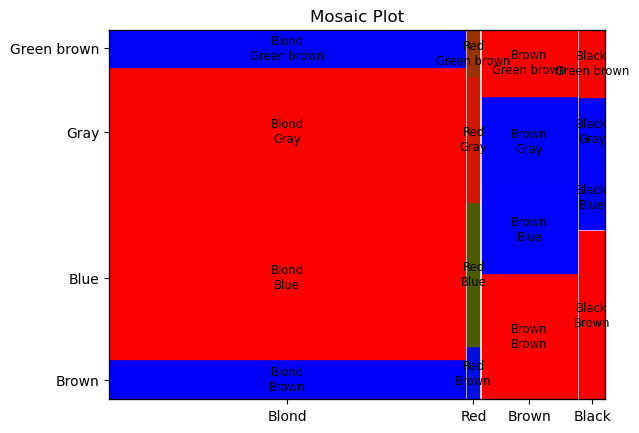

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(12, 8))
mosaic(df, ['HairColor', 'EyeColor'], statistic=True, title='Mosaic Plot')
plt.show()

<Figure size 1200x800 with 0 Axes>

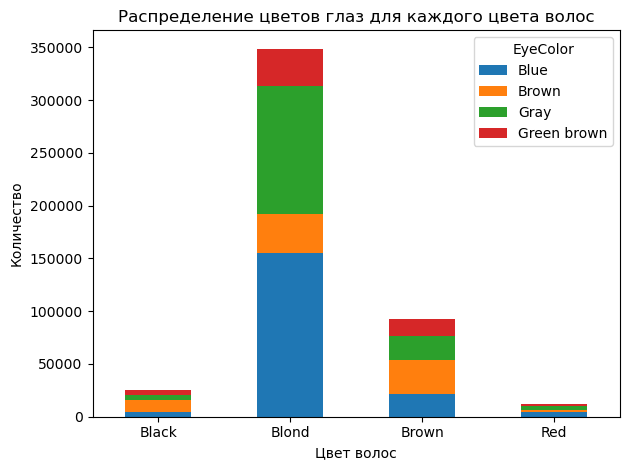

In [ ]:
plt.figure(figsize=(12, 8))
data.plot(kind='bar', stacked=True)
plt.title('Распределение цветов глаз для каждого цвета волос')
plt.xlabel('Цвет волос')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Вывод:** очень много блонда, очень мало красного цвета волос, маного голубоглазых, мало зеленых глаз

**г) [5 баллов]**. Рассчитайте суммы по столбцам, строкам, а также общую сумму. Рассчитайте тестовую $\chi^2$ для теста на независимость двух переменных. Определите степени свободы у распределения получившеся статистики, найдите критическое значение $\chi^2_{df}$ с помощью встроенной функции `.ppf()`

In [ ]:
from scipy.stats import chi2_contingency, chi2

In [ ]:
column_sums = data.sum(axis=0)
print("\nСуммы по столбцам:\n", column_sums)
row_sums = data.sum(axis=1)
print("\nСуммы по строкам:\n", row_sums)
total_sum = data.values.sum()
print("\nОбщая сумма:", total_sum)

# Хи-квадрат тест на независимость
chi2, p, dof, expected = chi2_contingency(data)



Суммы по столбцам:
 EyeColor
Blue           186033
Brown           82322
Gray           152104
Green brown     58455
dtype: int64

Суммы по строкам:
 HairColor
Black     25521
Blond    348816
Brown     92818
Red       11759
dtype: int64

Общая сумма: 478914


*Можете проверить себя, воспользовавшишь функцией `chi2_contingency()`*

**д) [3 балла]**. Постройте плотность распределения рассчитанной статистики, а найдите p-value точечной оценки, и обозначьте на графике. Также укажите несколько типичных уровней значимости $\alpha$ и нанесите их на график. Проинтерпретируйте результаты.

**Вывод**:

**е) [3 балла]**. Сделайте финальные выводы и при необходимости дополнительные расчеты, на которых они будут основываться. Есть ли стастистическая взаимосвязь между переменными. И если есть, то чем она может быть объяснена?

In [ ]:
# your code here
# (´｡• ᵕ •｡`)

**Вывод**:

### Задача №3. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [ ]:
df = pd.read_csv("ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [ ]:
print(df.info())
# Проверяем наличие пропущенных значений
print(df.isna().sum())
# Описательная статистика
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401807 entries, 0 to 401806
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    401807 non-null  int64 
 1   user_id       401807 non-null  int64 
 2   sex           401807 non-null  int64 
 3   datetime      401807 non-null  object
 4   district      401807 non-null  object
 5   hotel_page    401807 non-null  int64 
 6   payment_page  401807 non-null  int64 
 7   payment       401807 non-null  int64 
 8   group         401807 non-null  object
dtypes: int64(6), object(3)
memory usage: 27.6+ MB
None
Unnamed: 0      0
user_id         0
sex             0
datetime        0
district        0
hotel_page      0
payment_page    0
payment         0
group           0
dtype: int64
          Unnamed: 0       user_id            sex  hotel_page   payment_page  \
count  401807.000000  4.018070e+05  401807.000000    401807.0  401807.000000   
mean   200903.000000  4.61

In [ ]:
df[df['district']=='Южный федеральный округ']['group'].value_counts()

group
test       80774
control    39975
Name: count, dtype: int64

In [ ]:
df[df['district']=='Центральный федеральный округ']['group'].value_counts()

group
control    79949
test       40387
Name: count, dtype: int64

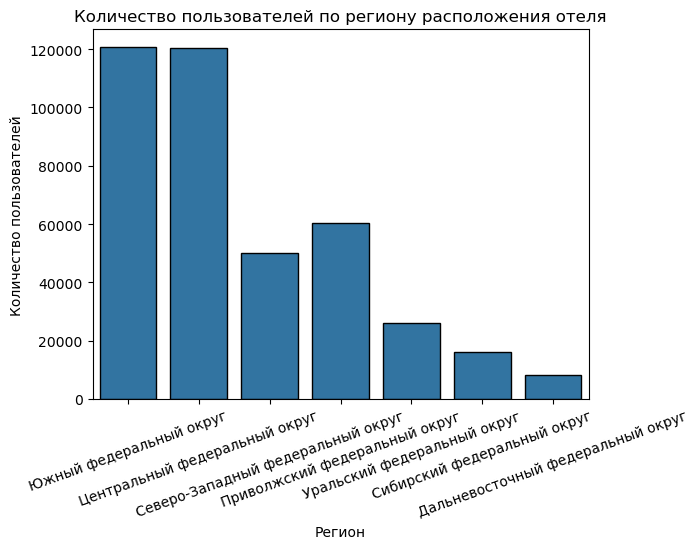

In [ ]:
sns.countplot(data=df, x='district',  edgecolor='black')
plt.title('Количество пользователей по региону расположения отеля')
plt.xlabel('Регион')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=20)
plt.show()

In [ ]:
users_per_group = df.groupby('group')['user_id'].nunique()
print("\nКоличество уникальных пользователей в каждой группе:\n", users_per_group)


Количество уникальных пользователей в каждой группе:
 group
control    199872
test       201935
Name: user_id, dtype: int64


In [ ]:
district_distribution = df.groupby(['group', 'district'])['user_id'].nunique()
print("\nРаспределение регионов в группах:\n", district_distribution)


Распределение регионов в группах:
 group    district                         
control  Дальневосточный федеральный округ     1999
         Приволжский федеральный округ        23985
         Северо-Западный федеральный округ    39974
         Сибирский федеральный округ           7994
         Уральский федеральный округ           5996
         Центральный федеральный округ        79949
         Южный федеральный округ              39975
test     Дальневосточный федеральный округ     6058
         Приволжский федеральный округ        36348
         Северо-Западный федеральный округ    10097
         Сибирский федеральный округ           8078
         Уральский федеральный округ          20193
         Центральный федеральный округ        40387
         Южный федеральный округ              80774
Name: user_id, dtype: int64


<font color='blue'>Количество данных в тестовой и контрольной выборке по регионам сильно отличается.Если количество пользователей в группах A и B существенно различается, то это может сместить результаты.</font>

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [ ]:
conver_page = df.groupby('district')['payment_page'].mean()
conver_pay = df.groupby('district')['payment'].mean()
conver = pd.merge(conver_page, conver_pay, on='district')
conver

,payment_page,payment
district,,
Дальневосточный федеральный округ,0.175251,0.309296
Приволжский федеральный округ,0.630120,0.301742
Северо-Западный федеральный округ,0.704040,0.267940
Сибирский федеральный округ,0.310042,0.288514
Уральский федеральный округ,0.438543,0.309748
Центральный федеральный округ,0.910068,0.277772
Южный федеральный округ,0.806690,0.307555


<font color='blue'>Во всех регионах кроме дальневосточного payment_page	> payment. </font>

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [ ]:
conver_page = df.groupby('group')['payment_page'].mean()
conver_pay = df.groupby('group')['payment'].mean()
conver = pd.merge(conver_page, conver_pay, on='group')
conver

,payment_page,payment
group,,
control,0.756999,0.250170
test,0.726803,0.333885


<font color='blue'> Можно заметить, чо на payment_page в среднем стало переходить меньше людей, но среднее количество тех, кто потом оплачивал отель, увеличилось. </font>

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [ ]:
reg_control = pd.DataFrame(df[df['group']=='control'].groupby('district')['payment'].value_counts())
reg_test = pd.DataFrame(df[df['group']=='test'].groupby('district')['payment'].value_counts())
reg_control

count
district                          payment       
Дальневосточный федеральный округ 0         1535
                                  1          464
Приволжский федеральный округ     0        17939
                                  1         6046
Северо-Западный федеральный округ 0        29911
                                  1        10063
Сибирский федеральный округ       0         6025
                                  1         1969
Уральский федеральный округ       0         4550
                                  1         1446
Центральный федеральный округ     0        59900
                                  1        20049
Южный федеральный округ           0        30010
                                  1         9965

In [ ]:
reg_test

count
district                          payment       
Дальневосточный федеральный округ 0         4030
                                  1         2028
Приволжский федеральный округ     0        24189
                                  1        12159
Северо-Западный федеральный округ 0         6744
                                  1         3353
Сибирский федеральный округ       0         5410
                                  1         2668
Уральский федеральный округ       0        13527
                                  1         6666
Центральный федеральный округ     0        27010
                                  1        13377
Южный федеральный округ           0        53602
                                  1        27172

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'>

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** <font color='blue'>Доля оплат выросла в целом, но не во всех регионах - парадокс Симпсона.</font>

## Задача №4: Не подглядывать! (40 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов.

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов.

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны.

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [ ]:
import math
a = 40
b = 20
alpha = 0.05
beta = 0.20
MDE = 5
people = 200
za = stats.norm.ppf(1 - alpha / 2)
zb = stats.norm.ppf(1 - beta)
total = 2*((a**2 + b**2)*(za + zb)**2)/MDE**2
day = math.ceil(total/people)
print(f'необходимо {day} дней')

необходимо 7 дней


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [ ]:
np.random.seed(41)
group_A = np.random.normal(loc = 100, scale = 40, size = 1000)
group_B = np.random.normal(loc = 105, scale = 20, size = 1000)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста:
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [ ]:
def AB_test(X, group_A, group_B):
    data = []
    for day in range(X):
        mean_A = group_A[:day+1].mean()
        mean_B = group_B[:day+1].mean()
        p_value = stats.ttest_ind(group_A[:day+1], group_B[:day+1]).pvalue
        data.append([mean_A, mean_B, p_value.astype(object)])
    data1= pd.DataFrame(data, columns=['mean_A', 'mean_B', 'p_value'])
    return data1

In [ ]:
df = AB_test(50, group_A, group_B)
df.head()

C:\Users\Kate\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


,mean_A,mean_B,p_value
0,89.171507,92.973877,NaN
1,96.682715,96.761422,0.993384
2,101.128847,104.285696,0.767994
3,91.594636,99.362642,0.567643
4,97.812858,94.225060,0.786548


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

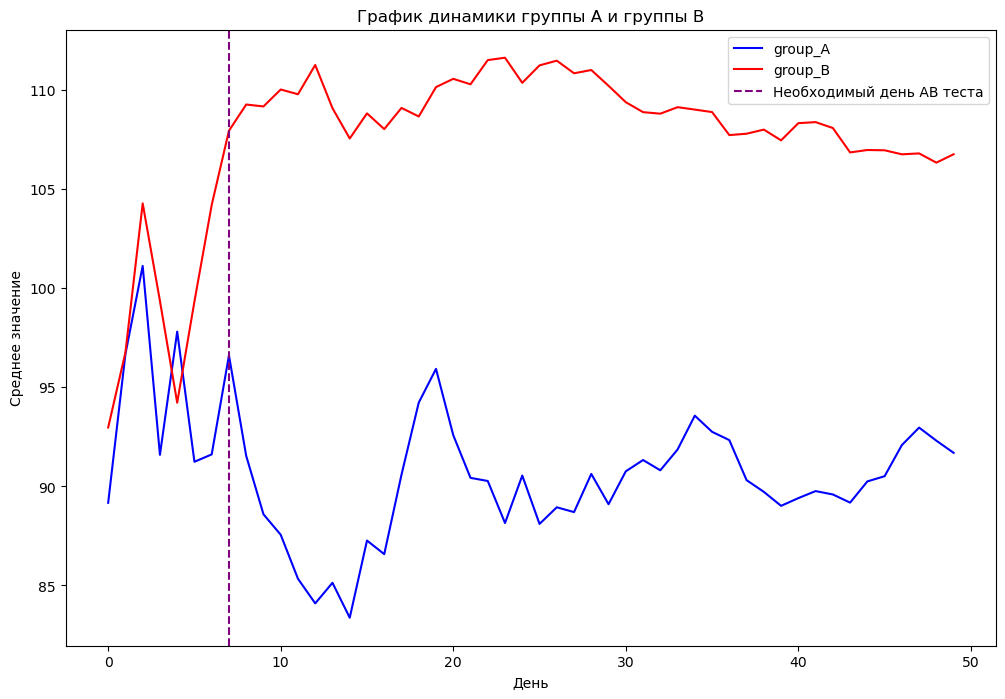

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df['mean_A'], label='group_A', color='blue')
plt.plot(df['mean_B'], label='group_B', color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.legend()
plt.xlabel('День')
plt.ylabel('Среднее значение')
plt.title('График динамики группы А и группы В')
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

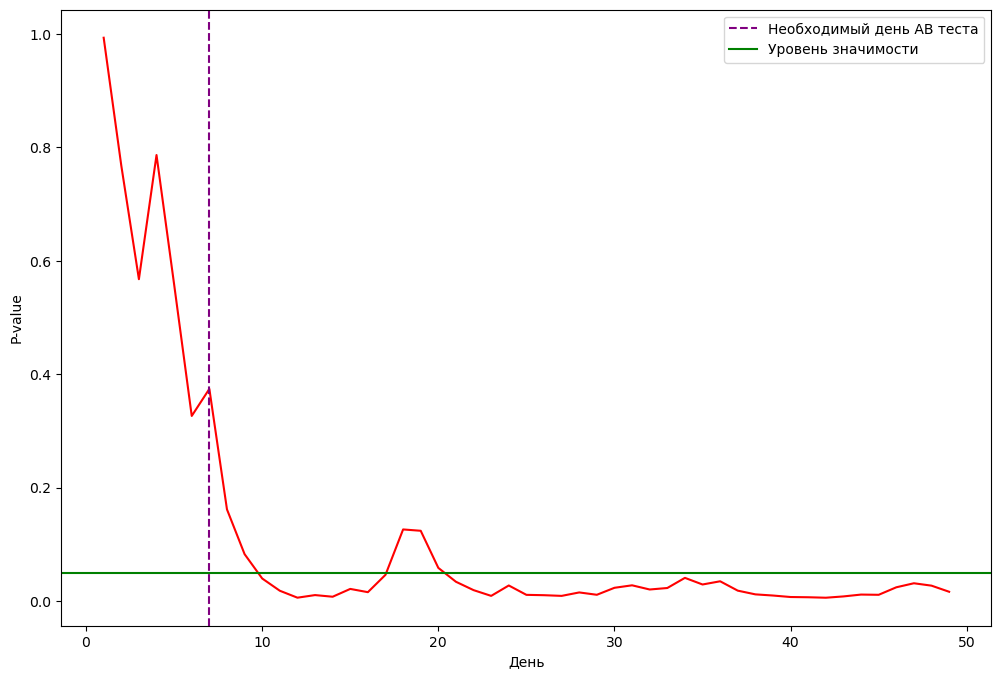

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df['p_value'], color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.axhline(y=alpha, linestyle='-', color='green', label='Уровень значимости')
plt.legend()
plt.xlabel('День')
plt.ylabel('P-value')
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

<font color='blue'>А. p-value движется уменьшается.\
В. p-value находится между 0.4 и 0.3.\
С. значения уменьшаются и идут не резко.</font>

C:\Users\Kate\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


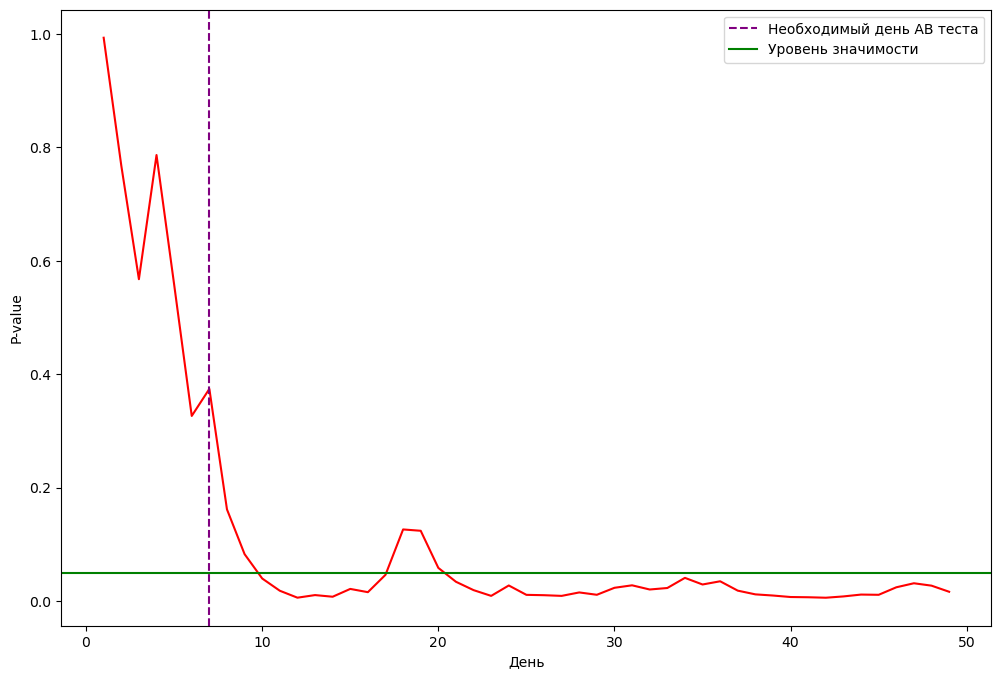

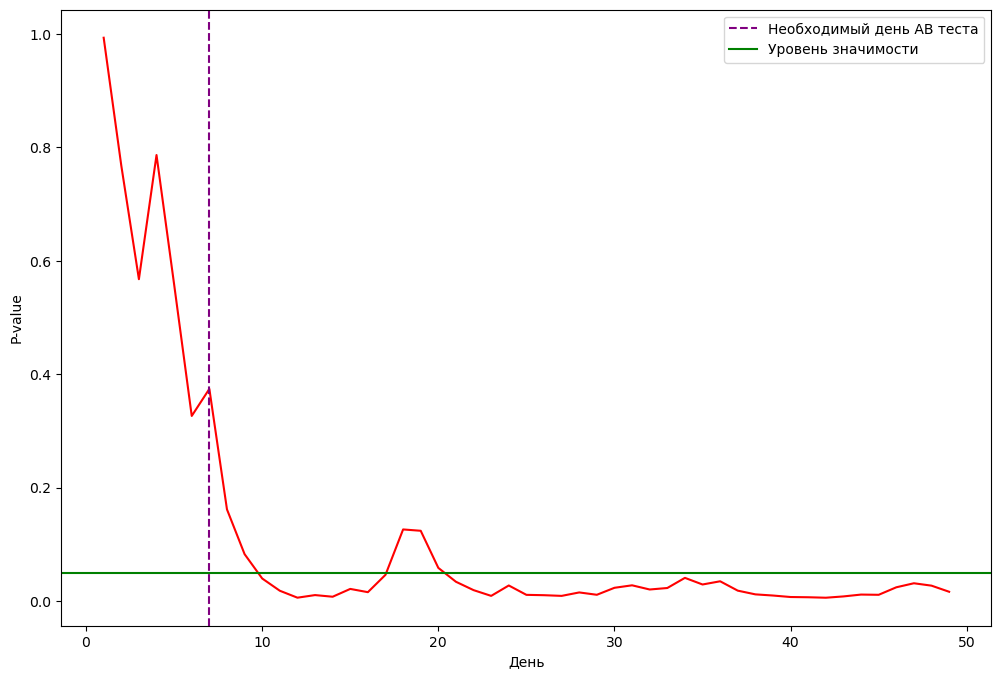

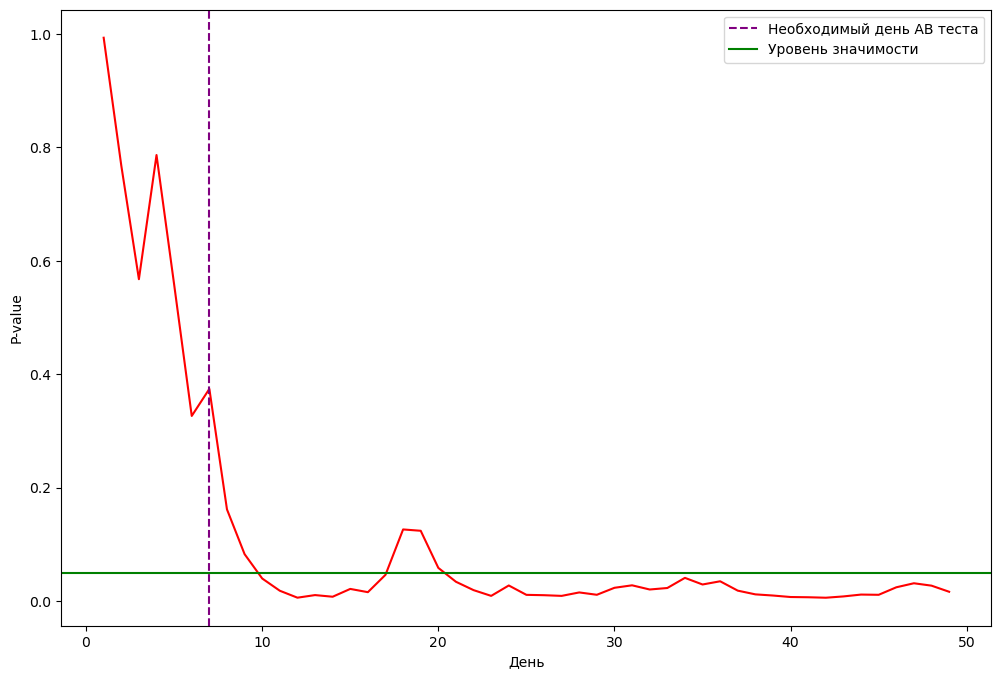

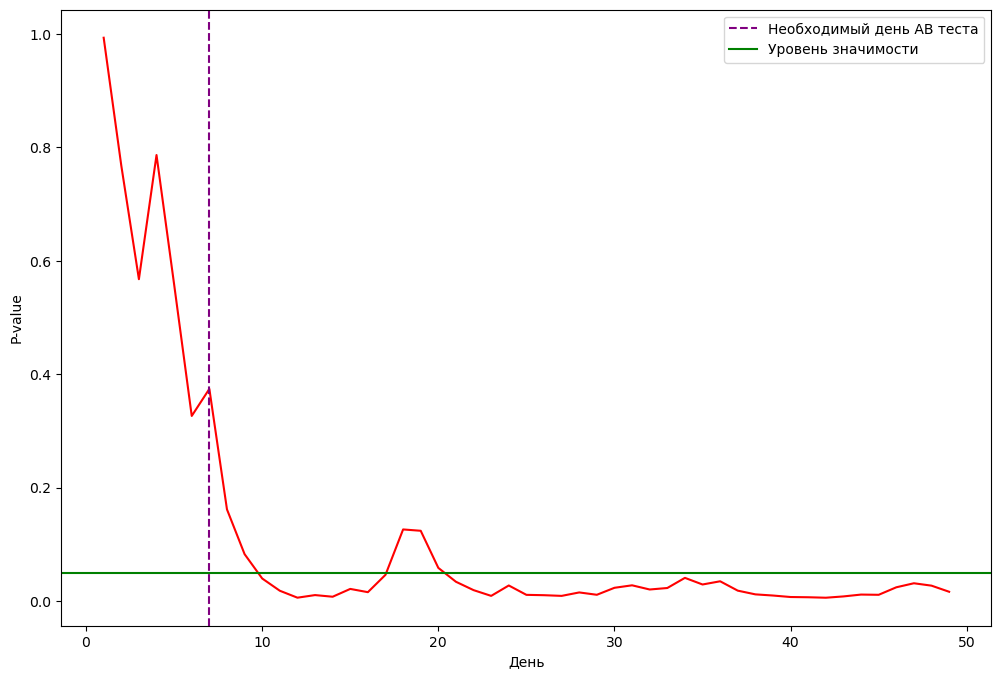

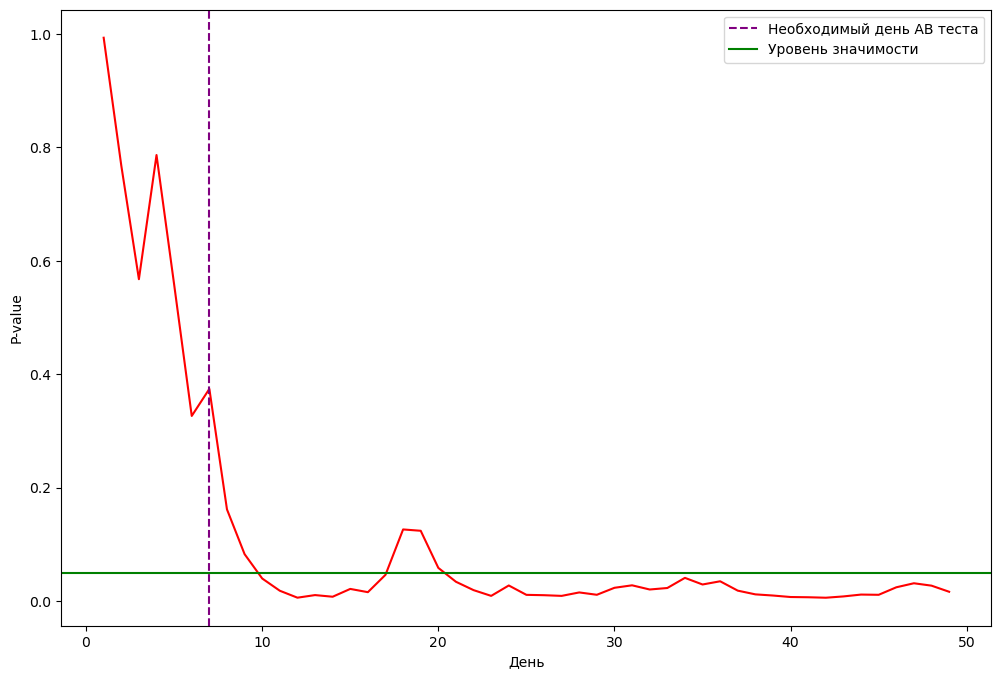

In [ ]:
for i in range(5):
    df = AB_test(50, group_A, group_B)
    plt.figure(figsize=(12, 8))
    plt.plot(df['p_value'], color='red')
    plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
    plt.axhline(y=alpha, linestyle='-', color='green', label='Уровень значимости')
    plt.legend()
    plt.xlabel('День')
    plt.ylabel('P-value')
    plt.show()

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [ ]:
np.random.seed(41)
group_A = np.random.normal(loc = 100, scale = 40, size = 1000)
group_B = np.random.normal(loc = 101, scale = 20, size = 1000)

In [ ]:
df = AB_test(50, group_A, group_B)
df.head()

C:\Users\Kate\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


,mean_A,mean_B,p_value
0,89.171507,88.973877,NaN
1,96.682715,92.761422,0.686951
2,101.128847,100.285696,0.936848
3,91.594636,95.362642,0.779224
4,97.812858,90.225060,0.570030


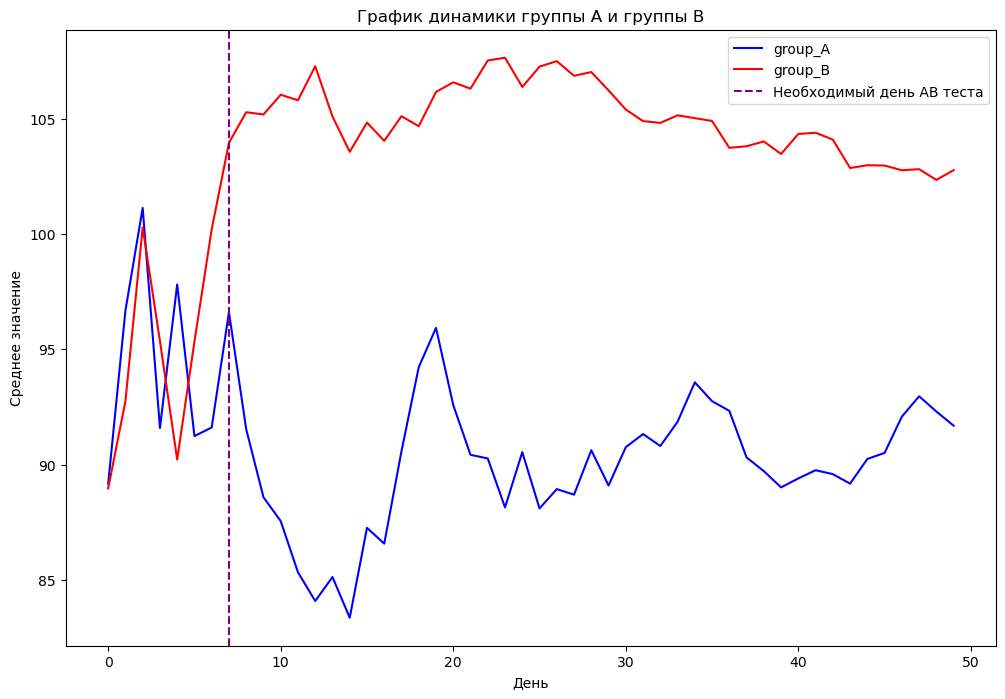

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df['mean_A'], label='group_A', color='blue')
plt.plot(df['mean_B'], label='group_B', color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.legend()
plt.xlabel('День')
plt.ylabel('Среднее значение')
plt.title('График динамики группы А и группы В')
plt.show()

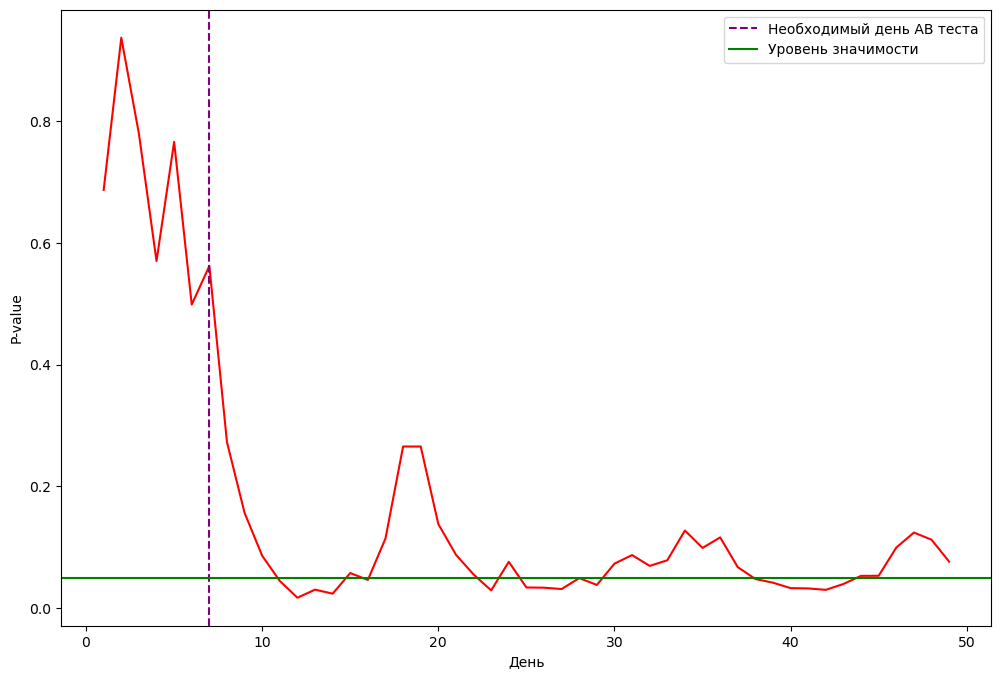

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df['p_value'], color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.axhline(y=alpha, linestyle='-', color='green', label='Уровень значимости')
plt.legend()
plt.xlabel('День')
plt.ylabel('P-value')
plt.show()

<font color='blue'>Глобально происходит всё то же самое, движение более хаотичное.</font>

__в) [10 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

C:\Users\Kate\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


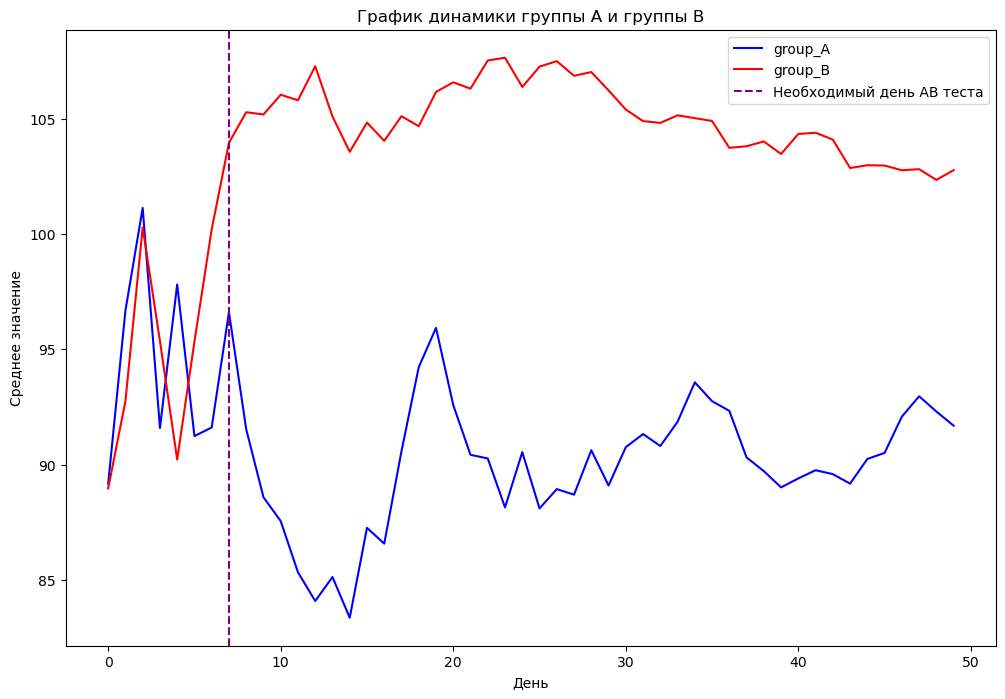

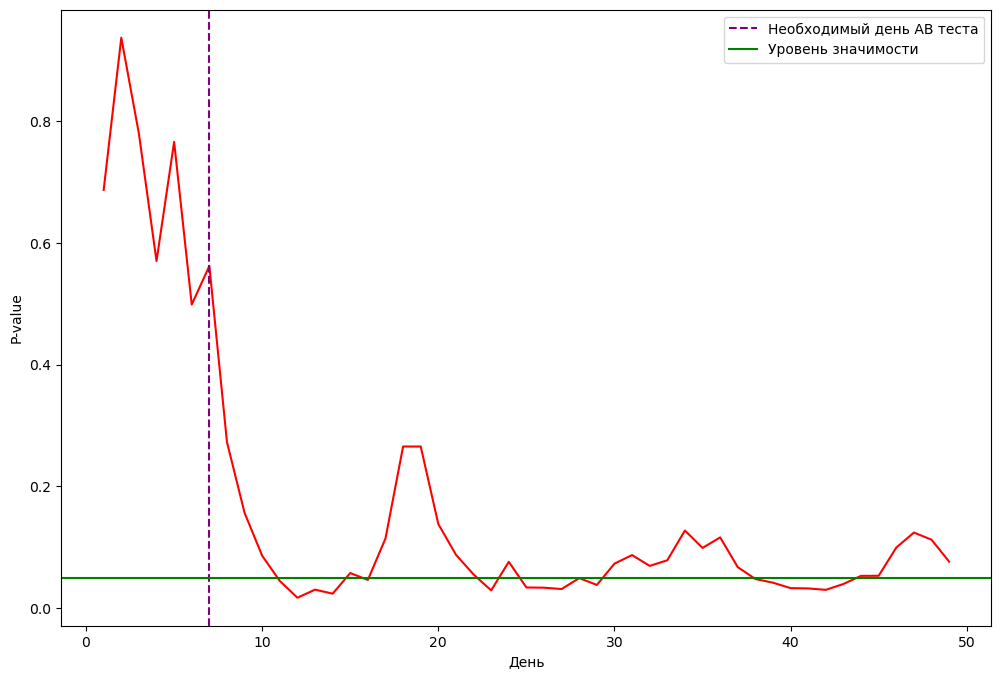

In [ ]:
np.random.seed(41)
group_A = np.random.normal(loc = 100, scale = 40, size = 1000)
group_B = np.random.normal(loc = 101, scale = 20, size = 1000)
df = AB_test(50, group_A, group_B)
plt.figure(figsize=(12, 8))
plt.plot(df['mean_A'], label='group_A', color='blue')
plt.plot(df['mean_B'], label='group_B', color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.legend()
plt.xlabel('День')
plt.ylabel('Среднее значение')
plt.title('График динамики группы А и группы В')
plt.show()
plt.figure(figsize=(12, 8))
plt.plot(df['p_value'], color='red')
plt.axvline(x=day, linestyle='--', color='purple', label='Необходимый день АВ теста')
plt.axhline(y=alpha, linestyle='-', color='green', label='Уровень значимости')
plt.legend()
plt.xlabel('День')
plt.ylabel('P-value')
plt.show()

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите?

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.